<a href="https://colab.research.google.com/github/vieirafrancisco/PI/blob/main/Transforma%C3%A7%C3%B5es_Morfol%C3%B3gicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Processamento de Imagens</center></h1>
<p><center>Transformações Morfológicas</center></p>

### Descrição:  
O objetivo deste trabalho é selecionar uma imagem e tentar remover o fundo dela utilizando transformações morfológicas. Semelhante ao que foi feito neste [link](https://stackoverflow.com/questions/64491530/how-to-remove-the-background-from-a-picture-in-opencv-python) !

### Requisitos mínimos implementados:
- Criação do Elemento Estruturante
- Implementação de erosão e dilatação
- Implementação de abertura: erosão seguido de dilatação
- Implementação do fechamento: dilatação seguida da erosão

### Implementações extras:
- Utilizando Limiarização
- Utilizando Média Adaptativa/Móvel

In [354]:
import os
from google.colab import drive
drive.mount('/drive/')

Drive already mounted at /drive/; to attempt to forcibly remount, call drive.mount("/drive/", force_remount=True).


In [355]:
os.chdir('/drive/My Drive/UFAL/PI')

In [356]:
import cv2 as cv 
from skimage import io
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

In [357]:
# Imagens que utilizei para fazer meus experimentos
img1 = cv.cvtColor(io.imread("suco.jpg"), cv.COLOR_RGBA2GRAY)
img2 = cv.cvtColor(io.imread("spiderman.jpg"), cv.COLOR_RGBA2GRAY)
img3 = cv.cvtColor(io.imread("spiderman2.jpg"), cv.COLOR_RGBA2GRAY)

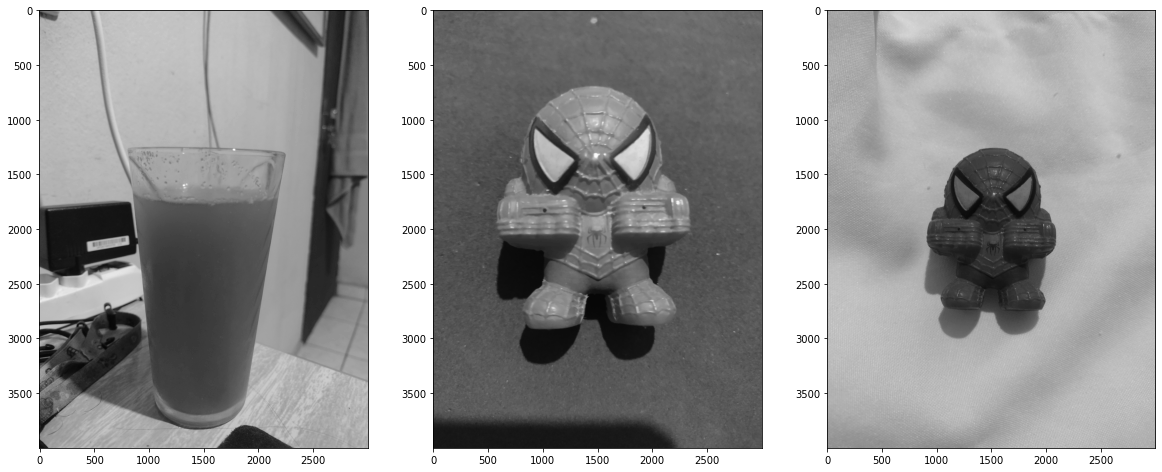

In [358]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img1, cmap="gray")
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(img2, cmap="gray")
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(img3, cmap="gray")

plt.show()

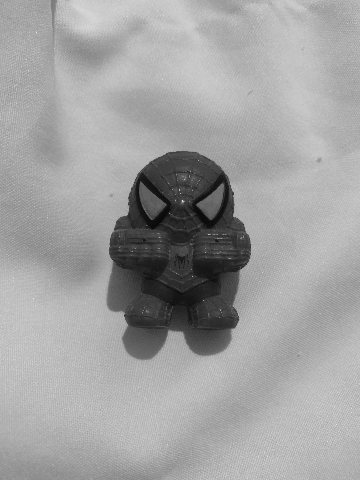

In [359]:
# Imagem 3 selecionada
img = img3
img = cv.resize(img, None, fx=.12, fy=.12)
cv2_imshow(img)

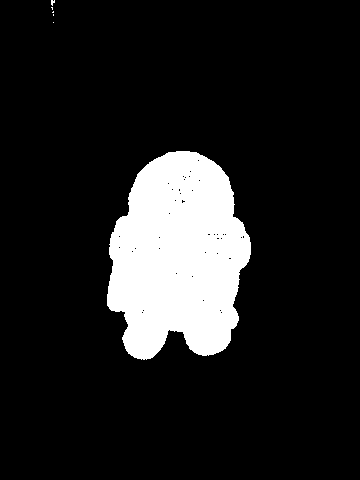

In [360]:
# Tentativa de binarização direto da imagem de origem.
# Utilizando um treshold global invertido
ret, b_img = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
cv2_imshow(b_img)

In [361]:
# Como o resultado da anterior não foi legal, resolvi tentar utilizar um threshold
# que substitui os pixels abaixo deste threshold pelo valor do threshold
ret, binary_img = cv.threshold(img,80,255,cv.THRESH_TRUNC)

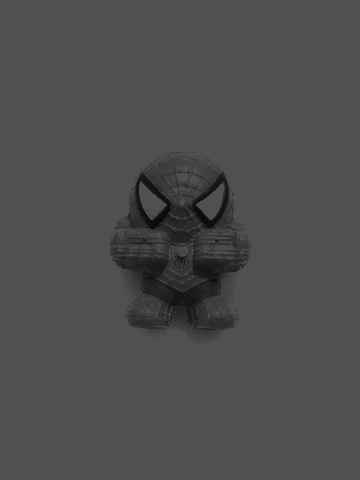

In [362]:
cv2_imshow(binary_img)

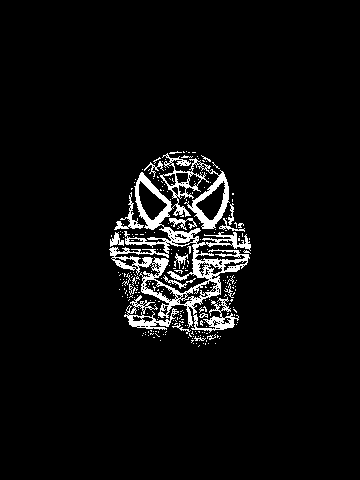

In [363]:
# Posteriomente, tentei calcular o threshold utilizando a média móvel e o resulto foi agradável!
# Somente a parte onde fica a sombra que manteve um ruído
at_img = cv.adaptiveThreshold(binary_img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV,11,2)
cv2_imshow(at_img)

In [364]:
# Elemento Estruturante
# Escolhi ELLIPSE para tentar suavizar as bordas
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(2,2))
kernel

array([[0, 1],
       [1, 1]], dtype=uint8)

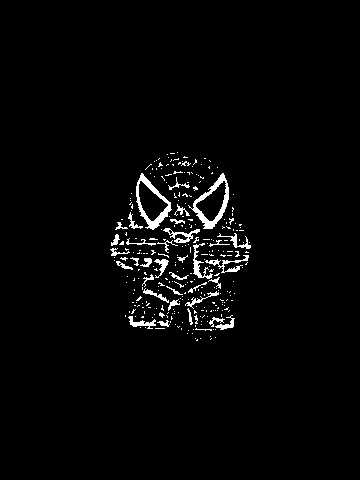

In [365]:
# Apliquei erosão para remover um pouco dos pontos brancos da sombra
erode = cv.erode(at_img, kernel,iterations=1)
cv2_imshow(erode)

In [366]:
# Apliquei fechamento: dilatação seguido de erosão
close = cv.morphologyEx(erode, cv.MORPH_CLOSE, kernel)
inv_img = 255 - close

In [370]:
# Apliquei abertura: erosão seguido de dilatação
open = cv.morphologyEx(at_img, cv.MORPH_OPEN, kernel)
dilate = cv.dilate(open, kernel, iterations=1)
dilate_inv_img = 255 - dilate

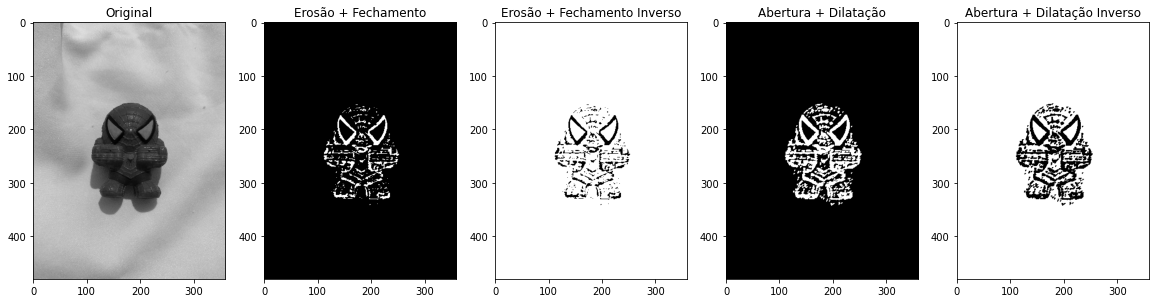

In [371]:
# Resultados
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1,5,1)
ax1.imshow(img, cmap="gray")
ax2 = fig.add_subplot(1,5,2)
ax2.imshow(close, cmap="gray")
ax3 = fig.add_subplot(1,5,3)
ax3.imshow(inv_img, cmap="gray")
ax4 = fig.add_subplot(1,5,4)
ax4.imshow(dilate, cmap="gray")
ax5 = fig.add_subplot(1,5,5)
ax5.imshow(dilate_inv_img, cmap="gray")

ax1.title.set_text('Original')
ax2.title.set_text('Erosão + Fechamento')
ax3.title.set_text('Erosão + Fechamento Inverso')
ax4.title.set_text('Abertura + Dilatação')
ax5.title.set_text('Abertura + Dilatação Inverso')

plt.show()